In [1]:
import pandas as pd
df = pd.read_csv('/content/Movies and TV Shows.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [3]:
df['rating'].fillna('ALL', inplace=True)
df['director'].fillna('Unknow', inplace=True)
df['country'].fillna('Unknow', inplace=True)
df['cast'].fillna('Unknow', inplace=True)
df.drop('date_added', axis=1, inplace=True)
d = df.copy()
d['genre'] = d['listed_in'].str.split(', ')
d = d.explode('genre')
d.drop('listed_in', axis=1, inplace=True)
d['act'] = d['cast'].str.split(', ')
d = d.explode('act')
d.drop('cast', axis=1, inplace=True)
d.rename(columns={'act': 'cast'}, inplace=True)
d['countries'] = d['country'].str.split(', ')
d = d.explode('countries')
d.drop('country', axis=1, inplace=True)
d.rename(columns={'countries': 'country'}, inplace=True)
d.drop('show_id', axis=1, inplace=True)

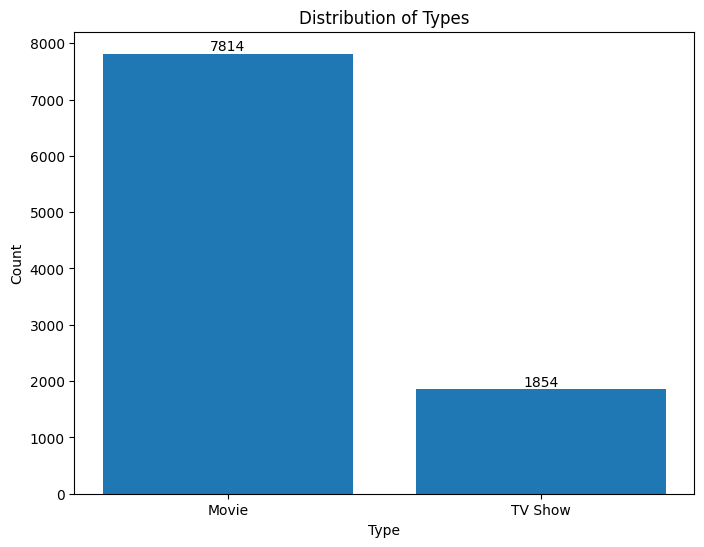

In [4]:
import matplotlib.pyplot as plt
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()


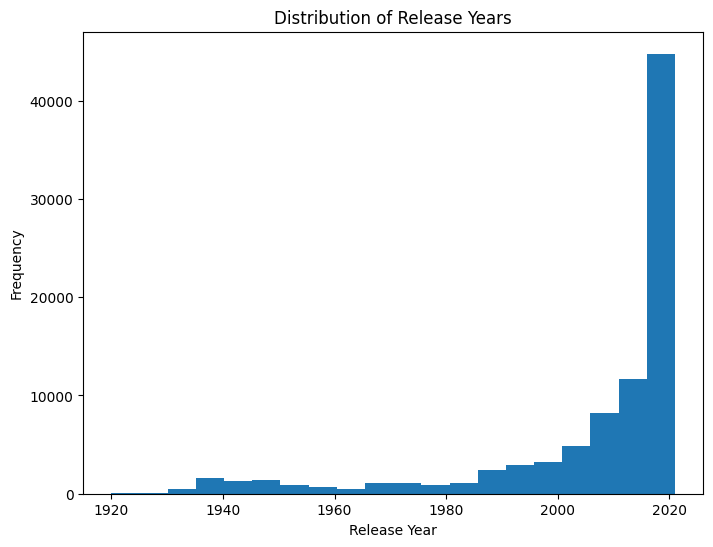

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(d['release_year'], bins=20)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()

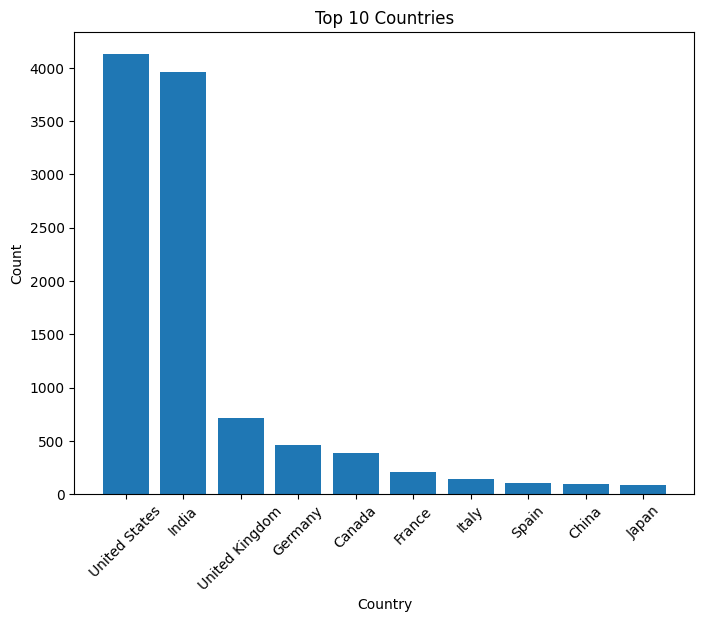

In [6]:
country_counts = d['country'].value_counts().drop('Unknow').head(10)
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

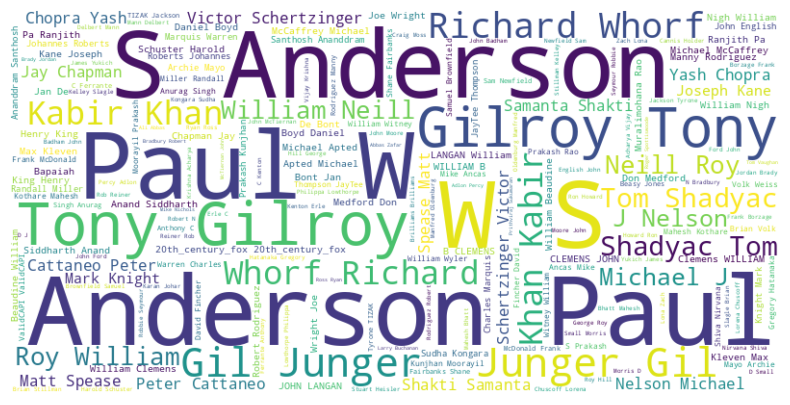

In [7]:
from wordcloud import WordCloud

# Concatenate all values in the 'director' column
directors_text = ' '.join([str(director) for director in d['director'] if director != 'Unknow'])

# Generate a word cloud from the 'director' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

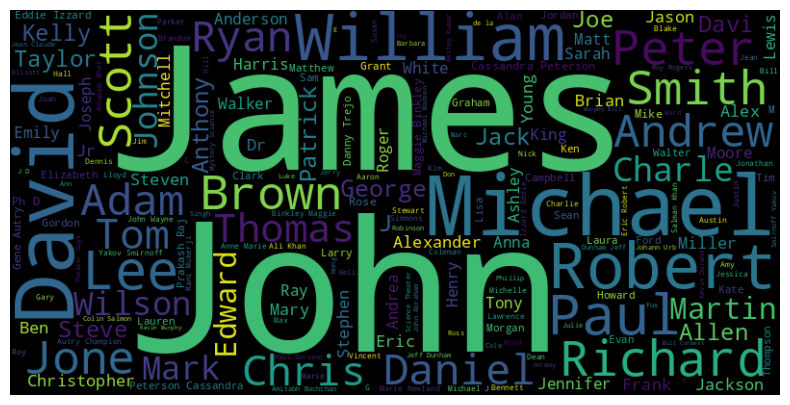

In [8]:
cast_text = ' '.join([str(cast) for cast in d['cast'] if cast != 'Unknow'])

# Generate a word cloud from the 'cast' column
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cast_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

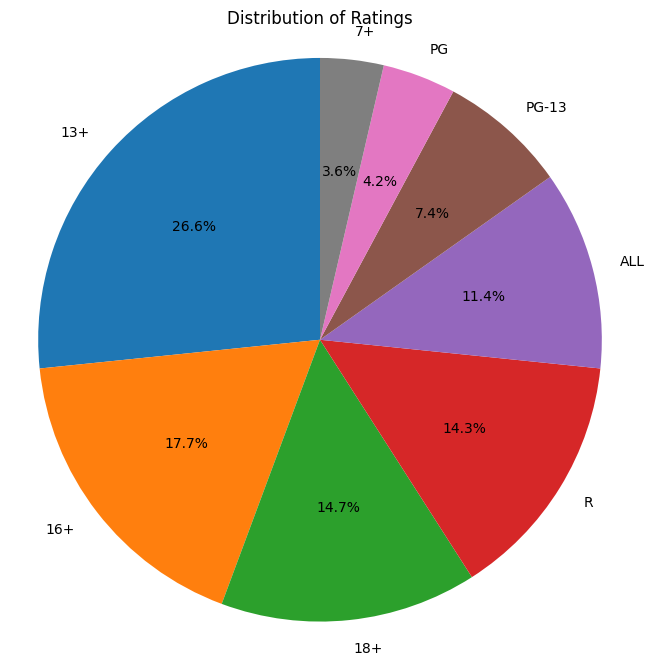

In [9]:
rating_counts = d['rating'].value_counts().head(8)
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()


In [10]:
selected_columns = ['director', 'rating', 'duration', 'genre', 'country']
df_cluster = d[selected_columns]
from sklearn.feature_extraction.text import TfidfVectorizer
df_cluster['text'] = df_cluster[selected_columns].apply(lambda x: ' '.join(x), axis=1)

# Apply TfidfVectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cluster['text'])

<ipython-input-10-9a7d277dc634>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['text'] = df_cluster[selected_columns].apply(lambda x: ' '.join(x), axis=1)


In [11]:
from sklearn.cluster import KMeans
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df_cluster['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-5befca400864>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster_label'] = kmeans.labels_


In [15]:
df_cluster = df_cluster.reset_index(drop=True)
label_mapping = {4: 1, 2: 2, 3: 3, 1: 4, 0: 5}
df_cluster['cluster_label'] = df_cluster['cluster_label'].map(label_mapping)